In [210]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools import add_constant

mpl.rc('font', family='Malgun Gothic')

In [2]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for linearmodels from https://files.pythonhosted.org/packages/71/cf/fdafe80ecb6ad016cb45e9405c9badc95d527520be13fa6515c271ef6fc8/linearmodels-6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython>=3.0.10 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyhdfe>=0.1 from https://files.pythonhosted.org/packages/2f/51/cb006fbc08c32f161035fb19ca718250eb5f6d0692ea6dcc1e62c3e556a2/pyhdfe-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for formulaic>=1.0.0 from https://files.pythonhosted.org/packages/2c/09/7a9f95d35106d882f79ddabc2d33d8f2a262863f1f5d6fd00f46c5fc90aa/formulaic-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools-scm[toml]<9.0.0,>=8.0.0 from 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [3]:
from linearmodels.panel import PanelOLS

In [8]:
df_population = pd.read_excel('(8개통합)행정구역_읍면동_별_5세별_주민등록인구_2011년__20240521180745_분석(전월_대비_증감,증감률).xlsx')
df_loan = pd.read_excel('예금은행 대출금리 관련 지표.xlsx')
df_grdp = pd.read_excel('GRDP_시_군_구__20240614151821.xlsx')

In [11]:
df_allpopulation = df_population[df_population['5세별'] == '계'][['행정구역(동읍면)별', '시점', '총인구수 (명)', '아파트 매매 원데이터', '미분양 주택 현황 원데이터']]

In [12]:
df_allpopulation

,행정구역(동읍면)별,시점,총인구수 (명),아파트 매매 원데이터,미분양 주택 현황 원데이터
0,창원시,2019-01-01,1053290,91.9,6736
22,창원시,2019-02-01,1052458,91.5,6773
44,창원시,2019-03-01,1051118,91.1,6750
66,창원시,2019-04-01,1049897,90.6,5892
88,창원시,2019-05-01,1049052,90.0,5892
...,...,...,...,...,...
10450,양산시,2023-08-01,354877,93.6,482
10472,양산시,2023-09-01,355032,93.6,476
10494,양산시,2023-10-01,355136,93.6,471
10516,양산시,2023-11-01,355270,93.5,465


In [13]:
df2_grdp = df_grdp[['행정구역(동읍면)별', '시점', 'GRDP(만원)']]
df2_grdp 

,행정구역(동읍면)별,시점,GRDP(만원)
0,서울특별시,2019-01-01,435927212
1,서울특별시,2019-02-01,435927212
2,서울특별시,2019-03-01,435927212
3,서울특별시,2019-04-01,435927212
4,서울특별시,2019-05-01,435927212
...,...,...,...
475,양산시,2023-08-01,11893017
476,양산시,2023-09-01,11893017
477,양산시,2023-10-01,11893017
478,양산시,2023-11-01,11893017


In [21]:
m1 = pd.merge(df_allpopulation, df2_grdp, on=['시점', '행정구역(동읍면)별'], how='left')

In [24]:
df_new_loan = df_loan[['시점', '가계대출 (연리%)', '주택담보대출 (연리%)']]
final_merge = pd.merge(m1, df_new_loan, on='시점', how='left')

In [25]:
final_merge['log_총인구수'] = np.log(final_merge['총인구수 (명)'])
final_merge['log_GRDP'] = np.log(final_merge['GRDP(만원)'])
final_merge

,행정구역(동읍면)별,시점,총인구수 (명),아파트 매매 원데이터,미분양 주택 현황 원데이터,GRDP(만원),가계대출 (연리%),주택담보대출 (연리%),log_총인구수,log_GRDP
0,창원시,2019-01-01,1053290,91.9,6736,39860038,3.58,3.12,13.867429,17.500885
1,창원시,2019-02-01,1052458,91.5,6773,39860038,3.50,3.08,13.866639,17.500885
2,창원시,2019-03-01,1051118,91.1,6750,39860038,3.53,3.04,13.865365,17.500885
3,창원시,2019-04-01,1049897,90.6,5892,39860038,3.48,2.98,13.864203,17.500885
4,창원시,2019-05-01,1049052,90.0,5892,39860038,3.49,2.93,13.863397,17.500885
...,...,...,...,...,...,...,...,...,...,...
475,양산시,2023-08-01,354877,93.6,482,11893017,4.83,4.31,12.779527,16.291462
476,양산시,2023-09-01,355032,93.6,476,11893017,4.90,4.35,12.779963,16.291462
477,양산시,2023-10-01,355136,93.6,471,11893017,5.04,4.56,12.780256,16.291462
478,양산시,2023-11-01,355270,93.5,465,11893017,5.04,4.48,12.780633,16.291462


In [26]:
final_merge = final_merge.set_index(['행정구역(동읍면)별', '시점'])
final_merge

총인구수 (명)  아파트 매매 원데이터  미분양 주택 현황 원데이터  GRDP(만원)  \
행정구역(동읍면)별 시점                                                            
창원시        2019-01-01   1053290         91.9            6736  39860038   
           2019-02-01   1052458         91.5            6773  39860038   
           2019-03-01   1051118         91.1            6750  39860038   
           2019-04-01   1049897         90.6            5892  39860038   
           2019-05-01   1049052         90.0            5892  39860038   
...                         ...          ...             ...       ...   
양산시        2023-08-01    354877         93.6             482  11893017   
           2023-09-01    355032         93.6             476  11893017   
           2023-10-01    355136         93.6             471  11893017   
           2023-11-01    355270         93.5             465  11893017   
           2023-12-01    355122         93.3             462  11893017   

                       가계대출 (연리%)  주택담보대출 (연리%)   log_총인구수   log_GRDP  
행정구역(동읍면)별 시점                                                          
창원시        2019-01-01        3.58          3.12  13.867429  17.500885  
           2019-02-01        3.50          3.08  13.866639  17.500885  
           2019-03-01        3.53          3.04  13.865365  17.500885  
           2019-04-01        3.48          2.98  13.864203  17.500885  
           2019-05-01        3.49          2.93  13.863397  17.500885  
...                           ...           ...        ...        ...  
양산시        2023-08-01        4.83          4.31  12.779527  16.291462  
           2023-09-01        4.90          4.35  12.779963  16.291462  
           2023-10-01        5.04          4.56  12.780256  16.291462  
           2023-11-01        5.04          4.48  12.780633  16.291462  
           2023-12-01        4.82          4.16  12.780217  16.291462  

[480 rows x 8 columns]

In [43]:
Y = final_merge['아파트 매매 원데이터']
X = final_merge[['log_총인구수', 'log_GRDP', '가계대출 (연리%)', '주택담보대출 (연리%)', '미분양 주택 현황 원데이터']]

In [44]:
X = sm.add_constant(X)

In [45]:
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

In [46]:
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            아파트 매매 원데이터   R-squared:                        0.6291
Estimator:                   PanelOLS   R-squared (Between):          -1.513e+04
No. Observations:                 480   R-squared (Within):               0.6291
Date:                Mon, Jun 17 2024   R-squared (Overall):             -1262.2
Time:                        05:02:38   Log-likelihood                   -1292.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      158.40
Entities:                           8   P-value                           0.0000
Avg Obs:                       60.000   Distribution:                   F(5,467)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             158.40
                            

In [47]:
# 다중공선성 검토
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
X_vif = final_merge[['log_총인구수', 'log_GRDP', '가계대출 (연리%)', '주택담보대출 (연리%)', '미분양 주택 현황 원데이터']]

In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [50]:
vif_data

,feature,VIF
0,log_총인구수,2618.427344
1,log_GRDP,2749.222419
2,가계대출 (연리%),470.228598
3,주택담보대출 (연리%),501.442906
4,미분양 주택 현황 원데이터,1.993926


In [51]:
# Ridge (L2규제) -> 다중 공선성 해결 방법
from sklearn.linear_model import Ridge

In [52]:
model = Ridge(alpha=0.5)
model.fit(X,Y)

Ridge(alpha=0.5)

In [56]:
print("회귀 계수:")
print(model.coef_)

회귀 계수:
[ 0.00000000e+00  1.13955190e+00 -1.57986077e+00 -1.37729720e+01
  1.83223130e+01 -1.21312703e-03]


In [57]:
print("R^2 값:", model.score(X, Y))

R^2 값: 0.5610483186860131


In [61]:
coef = model.coef_
intercept = model.intercept_
r_squared = model.score(X, Y)

In [62]:
coef_df = pd.DataFrame({'변수명': X.columns, '회귀계수': coef})
coef_df.loc[coef_df['변수명']=='const', '회귀계수'] = intercept

In [64]:
r2_df = pd.DataFrame({'변수명': ['R-squared'], '회귀계수': [r_squared]})
coef_df = pd.concat([coef_df, r2_df], ignore_index=True)

In [70]:
display(coef_df)

,변수명,회귀계수
0,const,99.787770
1,log_총인구수,1.139552
2,log_GRDP,-1.579861
3,가계대출 (연리%),-13.772972
4,주택담보대출 (연리%),18.322313
5,미분양 주택 현황 원데이터,-0.001213
6,R-squared,0.561048


In [71]:
# 릿지 회귀 모델 학습을 통해 부트스트랩 방법을 선택해 통계량을 근사
from IPython.display import display
from sklearn.utils import resample
from scipy import stats

In [75]:
final_merge

총인구수 (명)  아파트 매매 원데이터  미분양 주택 현황 원데이터  GRDP(만원)  \
행정구역(동읍면)별 시점                                                            
창원시        2019-01-01   1053290         91.9            6736  39860038   
           2019-02-01   1052458         91.5            6773  39860038   
           2019-03-01   1051118         91.1            6750  39860038   
           2019-04-01   1049897         90.6            5892  39860038   
           2019-05-01   1049052         90.0            5892  39860038   
...                         ...          ...             ...       ...   
양산시        2023-08-01    354877         93.6             482  11893017   
           2023-09-01    355032         93.6             476  11893017   
           2023-10-01    355136         93.6             471  11893017   
           2023-11-01    355270         93.5             465  11893017   
           2023-12-01    355122         93.3             462  11893017   

                       가계대출 (연리%)  주택담보대출 (연리%)   log_총인구수   log_GRDP  
행정구역(동읍면)별 시점                                                          
창원시        2019-01-01        3.58          3.12  13.867429  17.500885  
           2019-02-01        3.50          3.08  13.866639  17.500885  
           2019-03-01        3.53          3.04  13.865365  17.500885  
           2019-04-01        3.48          2.98  13.864203  17.500885  
           2019-05-01        3.49          2.93  13.863397  17.500885  
...                           ...           ...        ...        ...  
양산시        2023-08-01        4.83          4.31  12.779527  16.291462  
           2023-09-01        4.90          4.35  12.779963  16.291462  
           2023-10-01        5.04          4.56  12.780256  16.291462  
           2023-11-01        5.04          4.48  12.780633  16.291462  
           2023-12-01        4.82          4.16  12.780217  16.291462  

[480 rows x 8 columns]

In [138]:
X = final_merge[['log_총인구수', 'log_GRDP', '가계대출 (연리%)', '주택담보대출 (연리%)', '미분양 주택 현황 원데이터']]
y = final_merge['아파트 매매 원데이터']

In [144]:
# 결측치 제거를 위해 X와 y를 결합한 데이터프레임 생성
data = pd.concat([X, y], axis=1)
data

,const,log_총인구수,log_GRDP,가계대출 (연리%),주택담보대출 (연리%),미분양 주택 현황 원데이터,김해시,부산광역시,서울특별시,양산시,...,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,아파트 매매 원데이터
"(창원시, 2019-01-01 00:00:00)",1.0,13.867429,17.500885,3.58,3.12,6736.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91.9
"(창원시, 2019-02-01 00:00:00)",1.0,13.866639,17.500885,3.50,3.08,6773.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91.5
"(창원시, 2019-03-01 00:00:00)",1.0,13.865365,17.500885,3.53,3.04,6750.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91.1
"(창원시, 2019-04-01 00:00:00)",1.0,13.864203,17.500885,3.48,2.98,5892.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90.6
"(창원시, 2019-05-01 00:00:00)",1.0,13.863397,17.500885,3.49,2.93,5892.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.0,0.000000,0.000000,0.00,0.00,0.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,NaN
476,0.0,0.000000,0.000000,0.00,0.00,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,NaN
477,0.0,0.000000,0.000000,0.00,0.00,0.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,NaN
478,0.0,0.000000,0.000000,0.00,0.00,0.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,NaN


In [145]:
data = data.dropna()

In [146]:
# 결측치를 제거한 후 다시 X와 y로 분리
X = data.drop(columns='아파트 매매 원데이터')
y = data['아파트 매매 원데이터']

In [147]:
X = sm.add_constant(X)

In [148]:
# 다중 인덱스를 평면 인덱스로 변환
flat_index = X.index.to_flat_index()
X.index = flat_index
y.index = flat_index

In [151]:
# 인덱스에서 행정구역(동읍면)과 시점을 추출하여 열로 추가
X['행정구역'] = flat_index.map(lambda x: x[0])
X['시점'] = flat_index.map(lambda x: x[1])

In [152]:
# 행정구역(동읍면)과 시점을 더미 변수로 변환
entities = pd.get_dummies(X['행정구역'], drop_first=True)
time_periods = pd.get_dummies(X['시점'], drop_first=True)
X = pd.concat([X.drop(columns=['행정구역', '시점']), entities, time_periods], axis=1)

In [153]:
X = X.fillna(0)
X.columns = X.columns.astype(str)

In [155]:
# X와 y를 다시 합침
data = pd.concat([X, y], axis=1)
data

,const,log_총인구수,log_GRDP,가계대출 (연리%),주택담보대출 (연리%),미분양 주택 현황 원데이터,김해시,부산광역시,서울특별시,양산시,...,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,아파트 매매 원데이터
"(창원시, 2019-01-01 00:00:00)",1.0,13.867429,17.500885,3.58,3.12,6736.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,91.9
"(창원시, 2019-02-01 00:00:00)",1.0,13.866639,17.500885,3.50,3.08,6773.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,91.5
"(창원시, 2019-03-01 00:00:00)",1.0,13.865365,17.500885,3.53,3.04,6750.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,91.1
"(창원시, 2019-04-01 00:00:00)",1.0,13.864203,17.500885,3.48,2.98,5892.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,90.6
"(창원시, 2019-05-01 00:00:00)",1.0,13.863397,17.500885,3.49,2.93,5892.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(양산시, 2023-08-01 00:00:00)",1.0,12.779527,16.291462,4.83,4.31,482.0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,93.6
"(양산시, 2023-09-01 00:00:00)",1.0,12.779963,16.291462,4.90,4.35,476.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,93.6
"(양산시, 2023-10-01 00:00:00)",1.0,12.780256,16.291462,5.04,4.56,471.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,93.6
"(양산시, 2023-11-01 00:00:00)",1.0,12.780633,16.291462,5.04,4.48,465.0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,93.5


In [156]:
ridge = Ridge(alpha=0.5)

In [157]:
# 부트스트랩 설정
n_iterations = 1000
n_size = int(len(data) * 0.8)

coefficients = np.zeros((n_iterations, X.shape[1]))

In [158]:
# 부트스트랩 반복
for i in range(n_iterations):
    # 샘플링
    data_resample = resample(data, n_samples=n_size)
    
    # 샘플링된 데이터에서 X와 y를 분리합니다.
    X_resample = data_resample.drop(columns='아파트 매매 원데이터')
    y_resample = data_resample['아파트 매매 원데이터']
    
    # 모델 학습
    ridge.fit(X_resample, y_resample)
    
    # 회귀 계수 저장
    coefficients[i, :] = ridge.coef_

In [159]:
# 회귀 계수의 평균과 표준 편차 계산
coef_means = np.mean(coefficients, axis=0)
coef_std = np.std(coefficients, axis=0)

In [160]:
# T-통계량과 P-값 계산
t_stats = coef_means / coef_std
p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stats)))

C:\Users\a0108\AppData\Local\Temp\ipykernel_9708\3932213258.py:2: RuntimeWarning: invalid value encountered in divide
  t_stats = coef_means / coef_std


In [161]:
# 신뢰 구간 계산
lower_ci = coef_means - 1.96 * coef_std
upper_ci = coef_means + 1.96 * coef_std

In [162]:
# 결과 정리
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coef_means,
    'Std Error': coef_std,
    'T-Statistic': t_stats,
    'P-Value': p_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
})

In [163]:
# R^2 값(결정계수) 추가
r_squared = ridge.score(X, y)
r2_df = pd.DataFrame({'Variable': ['R-squared'], 'Coefficient': [r_squared], 'Std Error': [np.nan], 'T-Statistic': [np.nan], 'P-Value': [np.nan], 'Lower CI': [np.nan], 'Upper CI': [np.nan]})
results_df = pd.concat([results_df, r2_df], ignore_index=True)

In [164]:
display(results_df)

,Variable,Coefficient,Std Error,T-Statistic,P-Value,Lower CI,Upper CI
0,const,0.000000,0.000000,NaN,NaN,0.000000,0.000000
1,log_총인구수,-5.471773,0.735653,-7.437980,1.021405e-13,-6.913653,-4.029893
2,log_GRDP,4.823384,0.665235,7.250651,4.147793e-13,3.519524,6.127244
3,가계대출 (연리%),-6.247083,0.491457,-12.711352,0.000000e+00,-7.210339,-5.283827
4,주택담보대출 (연리%),9.227325,0.617640,14.939652,0.000000e+00,8.016751,10.437899
...,...,...,...,...,...,...,...
134,2023-09-01 00:00:00,-4.925352,1.144431,-4.303758,1.679249e-05,-7.168436,-2.682269
135,2023-10-01 00:00:00,-5.943180,1.252717,-4.744232,2.092993e-06,-8.398506,-3.487855
136,2023-11-01 00:00:00,-5.292546,1.322086,-4.003179,6.249697e-05,-7.883835,-2.701258
137,2023-12-01 00:00:00,-3.953316,1.416833,-2.790247,5.266777e-03,-6.730309,-1.176322


In [167]:
results_df.head(5)

,Variable,Coefficient,Std Error,T-Statistic,P-Value,Lower CI,Upper CI
0,const,0.000000,0.000000,NaN,NaN,0.000000,0.000000
1,log_총인구수,-5.471773,0.735653,-7.437980,1.021405e-13,-6.913653,-4.029893
2,log_GRDP,4.823384,0.665235,7.250651,4.147793e-13,3.519524,6.127244
3,가계대출 (연리%),-6.247083,0.491457,-12.711352,0.000000e+00,-7.210339,-5.283827
4,주택담보대출 (연리%),9.227325,0.617640,14.939652,0.000000e+00,8.016751,10.437899


In [193]:
X = X.fillna(0)
X = X.astype(float)

In [194]:
# 열 이름을 문자열로 변환
X.columns = X.columns.astype(str)
X

,const,log_총인구수,log_GRDP,가계대출 (연리%),주택담보대출 (연리%),미분양 주택 현황 원데이터,김해시,부산광역시,서울특별시,양산시,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
"(창원시, 2019-01-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6736.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(창원시, 2019-02-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6773.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(창원시, 2019-03-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6750.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(창원시, 2019-04-01 00:00:00)",1.0,13.0,17.0,3.0,2.0,5892.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(창원시, 2019-05-01 00:00:00)",1.0,13.0,17.0,3.0,2.0,5892.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(양산시, 2023-08-01 00:00:00)",1.0,12.0,16.0,4.0,4.0,482.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(양산시, 2023-09-01 00:00:00)",1.0,12.0,16.0,4.0,4.0,476.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
"(양산시, 2023-10-01 00:00:00)",1.0,12.0,16.0,5.0,4.0,471.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(양산시, 2023-11-01 00:00:00)",1.0,12.0,16.0,5.0,4.0,465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [195]:
# 다시 다중공선성 계산
X_vif = X.drop(columns='const')

In [196]:
# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [197]:
display(vif_data)

,Variable,VIF
0,log_총인구수,inf
1,log_GRDP,31.778284
2,가계대출 (연리%),inf
3,주택담보대출 (연리%),inf
4,미분양 주택 현황 원데이터,2.149956
...,...,...
132,2023-08-01 00:00:00,inf
133,2023-09-01 00:00:00,inf
134,2023-10-01 00:00:00,inf
135,2023-11-01 00:00:00,inf


In [199]:
final_merge['잔차'] = results.resids

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


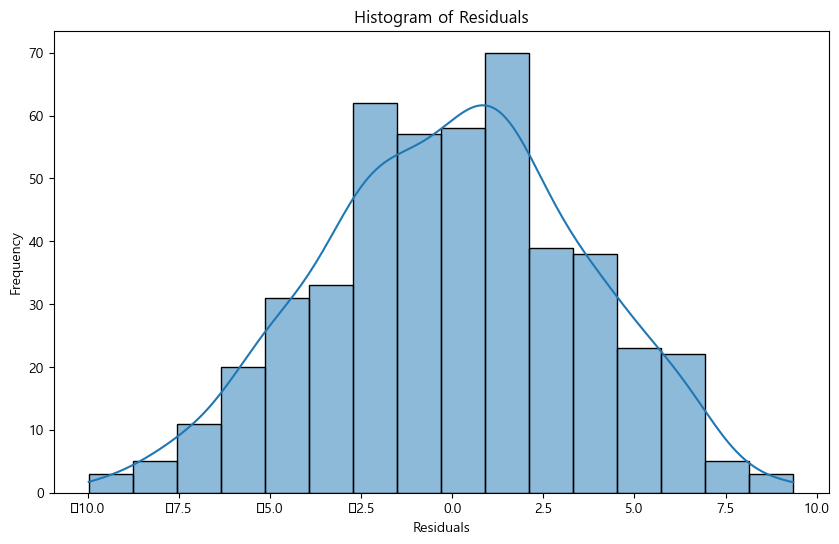

In [200]:
# 잔차의 히스토그램 (정규성 검토)
plt.figure(figsize=(10, 6))
sns.histplot(final_merge['잔차'], kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [204]:
data = pd.concat([X, y], axis=1)
data

,const,log_총인구수,log_GRDP,가계대출 (연리%),주택담보대출 (연리%),미분양 주택 현황 원데이터,김해시,부산광역시,서울특별시,양산시,...,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,아파트 매매 원데이터
"(창원시, 2019-01-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6736.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.9
"(창원시, 2019-02-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6773.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.5
"(창원시, 2019-03-01 00:00:00)",1.0,13.0,17.0,3.0,3.0,6750.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.1
"(창원시, 2019-04-01 00:00:00)",1.0,13.0,17.0,3.0,2.0,5892.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.6
"(창원시, 2019-05-01 00:00:00)",1.0,13.0,17.0,3.0,2.0,5892.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(양산시, 2023-08-01 00:00:00)",1.0,12.0,16.0,4.0,4.0,482.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,93.6
"(양산시, 2023-09-01 00:00:00)",1.0,12.0,16.0,4.0,4.0,476.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,93.6
"(양산시, 2023-10-01 00:00:00)",1.0,12.0,16.0,5.0,4.0,471.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.6
"(양산시, 2023-11-01 00:00:00)",1.0,12.0,16.0,5.0,4.0,465.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,93.5


In [205]:
data = data.dropna()

In [207]:
# 결측치를 제거한 후 다시 X와 y로 분리
X = data.drop(columns='아파트 매매 원데이터')
y = data['아파트 매매 원데이터']

In [211]:
X = add_constant(X)
model = OLS(y, X).fit()

In [212]:
# 예측값과 잔차 계산
predictions = model.fittedvalues
residuals = y - predictions

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


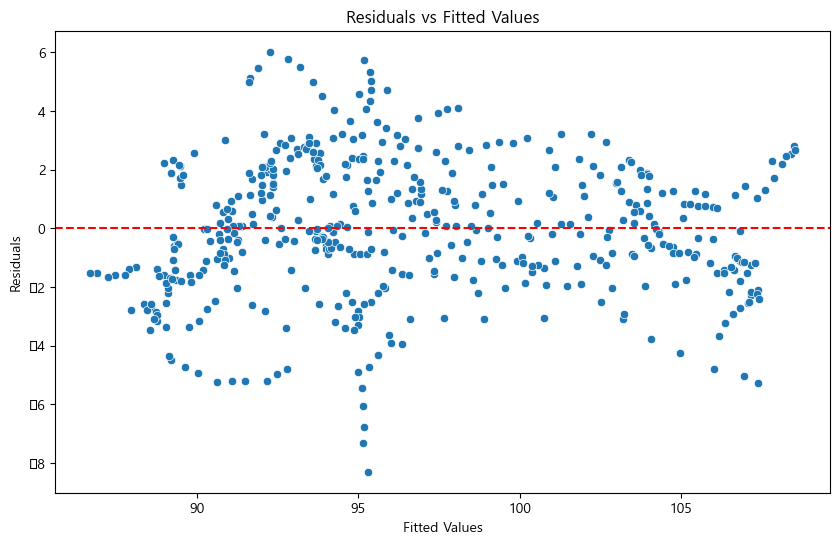

In [214]:
# 잔차 vs. 예측값 산점도 (독립성, 등분산성 검토)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()